<pre>
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$'               `$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$  
$$$$$$$$$$$$$$$$$$$$$$$$$$$$'                   `$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$'`$$$$$$$$$$$$$'`$$$$$$!                       !$$$$$$'`$$$$$$$$$$$$$'`$$$
$$$$  $$$$$$$$$$$  $$$$$$$                         $$$$$$$  $$$$$$$$$$$  $$$$
$$$$. `$' \' \$`  $$$$$$$!                         !$$$$$$$  '$/ `/ `$' .$$$$
$$$$$. !\  i  i .$$$$$$$$                           $$$$$$$$. i  i  /! .$$$$$
$$$$$$   `--`--.$$$$$$$$$                           $$$$$$$$$.--'--'   $$$$$$
$$$$$$L        `$$$$$^^$$                           $$^^$$$$$'        J$$$$$$
$$$$$$$.   .'   ""~   $$$    $.                 .$  $$$   ~""   `.   .$$$$$$$
$$$$$$$$.  ;      .e$$$$$!    $$.             .$$  !$$$$$e,      ;  .$$$$$$$$
$$$$$$$$$   `.$$$$$$$$$$$$     $$$.         .$$$   $$$$$$$$$$$$.'   $$$$$$$$$
$$$$$$$$    .$$$$$$$$$$$$$!     $$`$$$$$$$$'$$    !$$$$$$$$$$$$$.    $$$$$$$$
$JT&yd$     $$$$$$$$$$$$$$$$.    $    $$    $   .$$$$$$$$$$$$$$$$     $by&TL$
                                 $    $$    $
                                 $.   $$   .$
                                 `$        $'
                                  `$$$$$$$$'
                                  
<b>Face recognition using Grid Search</b>
by Alin Cijov
</pre>

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Dataset

In [2]:
class lfwPeopleDataset():
    
    def __init__(self, min_faces_per_person):
        self.faces = fetch_lfw_people(min_faces_per_person=min_faces_per_person)
    
    def draw_sample(self):
        fig, ax = plt.subplots(3, 5)
        for i, axi in enumerate(ax.flat):
            axi.imshow(self.faces.images[i], cmap='bone')
            axi.set(xticks=[], yticks=[],
            xlabel=self.faces.target_names[self.faces.target[i]])
            
    def get_features_labels(self):
        return self.faces.data, self.faces.target, self.faces.target_names

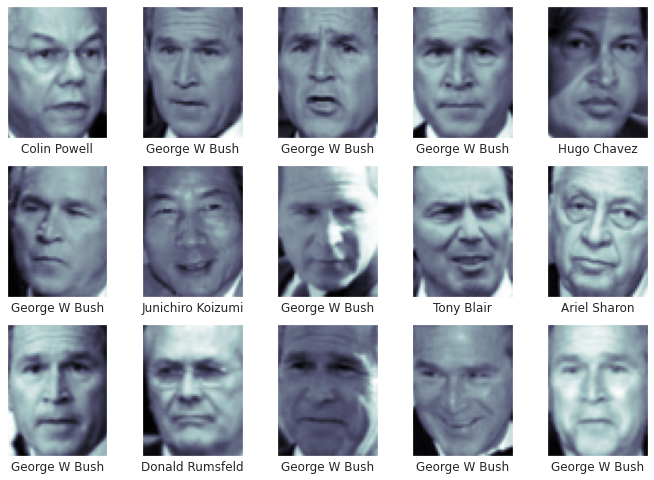

In [3]:
lfw_ds = lfwPeopleDataset(60)
lfw_ds.draw_sample()

In [4]:
features, labels, target_names = lfw_ds.get_features_labels()

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    random_state=42)

# Model

In [5]:
class GridSearch():
    def __init__(self):
        pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
        svc = SVC(kernel='rbf', class_weight='balanced')
        self.model = make_pipeline(pca, svc)
        
        param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
        self.grid = GridSearchCV(self.model, param_grid)
        
    def fit(self, X, y):
        %time self.grid.fit(X, y)
        print(self.grid.best_params_)
        self.model = self.grid.best_estimator_
        
    def predict(self, X):
        return self.model.predict(X)
    
    def plot_sample(self, target_names, y_hat):
        fig, ax = plt.subplots(4, 6)
        for i, axi in enumerate(ax.flat):
            axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
            axi.set(xticks=[], yticks=[])
            axi.set_ylabel(target_names[y_hat[i]].split()[-1],
            color='black' if y_hat[i] == y_test[i] else 'red')
            fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
            
    def report(self, target_names, y, y_hat):
        print(classification_report(y, y_hat,
              target_names=target_names))
        
    def heatmap(self, target_names, y, y_hat):
        mat = confusion_matrix(y, y_hat)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=target_names,
        yticklabels=target_names)
        plt.xlabel('true label')
        plt.ylabel('predicted label')

In [6]:
grid = GridSearch()

In [7]:
grid.fit(X_train, y_train)

CPU times: user 10min 6s, sys: 3min 19s, total: 13min 25s
Wall time: 8min 16s
{'svc__C': 10, 'svc__gamma': 0.001}


# Analysis

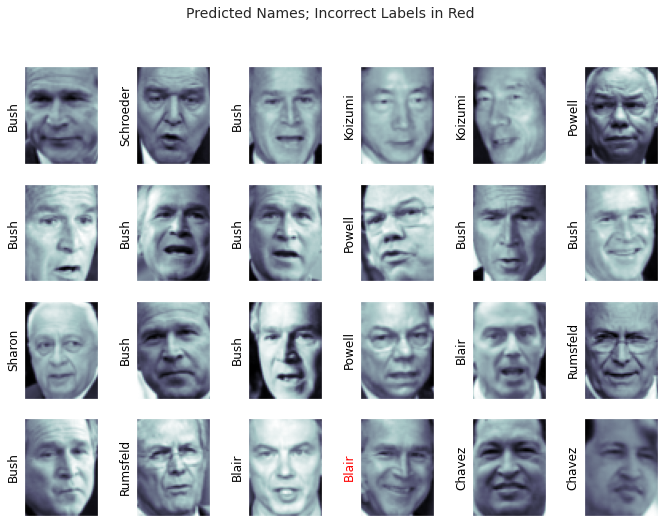

In [8]:
y_hat = grid.predict(X_test)
grid.plot_sample(target_names, y_hat)

In [9]:
grid.report(target_names, y_test, y_hat)

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



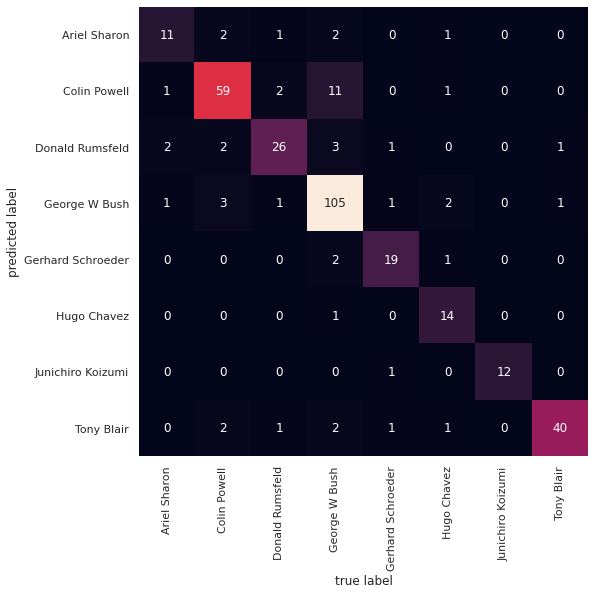

In [10]:
grid.heatmap(target_names, y_test, y_hat)